# Data handling, exploration and pca 

In [47]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn import decomposition

from scipy import stats

import time

In [2]:
df = pd.read_csv('used.csv', index_col=0)
#df2 = pd.read_csv('original.csv',index_col=0)

In [3]:
df.head()

,SN_2,Questionnaire,gn,ds,District,Province,A1_1,A1_2,A1_3,A1_4,...,trust_eth,reconcile1,reconcile2,reconcile2add,reconcile1add,tol_buddhist,tol_christ,prewar,rights_sinhaleseALL,ethnic2
1,1,1,32,33,3,1,1,2.0,3.0,5.0,...,2.0,1.559590,-0.047157,1.5,2.5,NaN,NaN,0,3.0,2.0
2,2,1,32,33,3,1,1,2.0,3.0,3.0,...,2.0,0.038614,-0.125119,1.5,1.5,NaN,NaN,0,3.0,2.0
3,3,1,32,33,3,1,1,2.0,3.0,3.0,...,2.0,0.311233,-0.532862,1.5,1.5,NaN,NaN,0,2.0,2.0
4,4,1,32,33,3,1,1,2.0,3.0,3.0,...,2.0,0.038614,-0.125119,1.5,1.5,NaN,NaN,0,2.0,2.0
5,5,1,32,33,3,1,1,2.0,3.0,3.0,...,1.0,-0.982462,-0.235567,1.5,1.0,NaN,NaN,0,2.0,2.0


In [4]:
# sem (distress <- war gender age edu eduf) 
# (growth1 <- distress war )
# (growth2 <- distress war )
# (rights_sinhalese <- war distress growth1 growth2 gender age edu eduf), 
# stand
# cov(e.distress*e.growth1)
# cov(e.distress*e.growth2)
# cov(e.growth1*e.growth2)
# ;
# #delimit cr 
# estat gof, stats(indices residuals)

In [5]:
# for i in df.columns:
#     print(i)

In [6]:
# growth
# growthf1
# growthf2
# growth1factor
# growth2factor
# growth1
# growth2

In [7]:
# df['my_growth1']=(df['E2a']+df['E2c']+df['E2f']+df['E2g']+df['E2i']+df['E2j'])/6
# df['my_growth2']=(df['E2b']+df['E2d']+df['E2e']+df['E2h'])/4

In [8]:
# men har du kun termiler her?
#keep if tamil2==1 Carolin
#df_carolin = df[df['tamil2']==1][['rights_sinhalese','distress','war','gender','age','edu','eduf','growth1', 'growth2']].dropna().copy()

df_carolin = Es_non_norm = df[df['tamil2']==1][['rights_sinhalese','distress','war','gender','age','edu','eduf','growth1', 'growth2',
                                  'E2a','E2c','E2f','E2g','E2i','E2j','E2b','E2d','E2e','E2h']].dropna().copy()

# full additive index
df_carolin['growth_full'] = (df_carolin['E2a']+df_carolin['E2c']+df_carolin['E2f']+df_carolin['E2g']+
                             df_carolin['E2i']+df_carolin['E2j'] + df_carolin['E2b']+df_carolin['E2d']+
                             df_carolin['E2e']+df_carolin['E2h'])/10


#df_carolin = df[['rights_sinhalese','distress','war','gender','age','edu','eduf','growth1', 'growth2']].copy()

#religiosity
df_carolin.shape

(359, 20)

# Some data exploration:

In [9]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn import linear_model

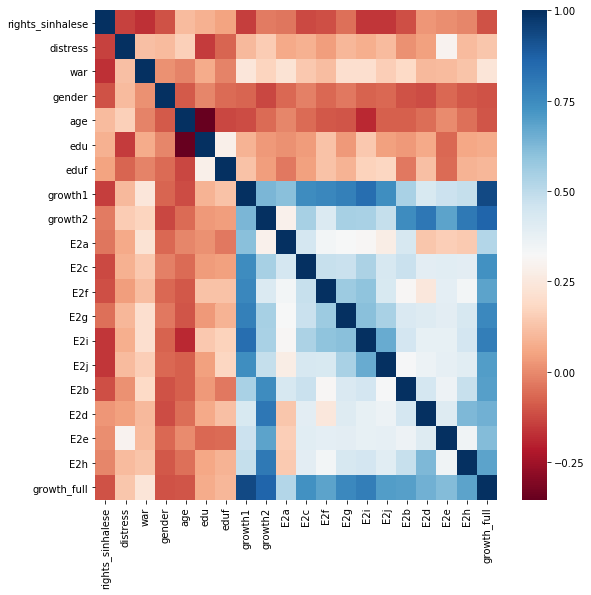

In [10]:
# make a corr plot:
plt.figure(figsize=[9,9])
sns.heatmap(df_carolin.corr(), cmap="RdBu")
plt.show()

## feature selection1:

In [11]:
X = df_carolin.drop(columns='rights_sinhalese', axis=1)
Y = df_carolin['rights_sinhalese']

time_start = time.time()

sfs_f = sfs(estimator = linear_model.LinearRegression(), k_features= 'best', forward = True, verbose = 2, scoring = 'neg_mean_squared_error', cv = 10, n_jobs = 6)

sfs_f = sfs_f.fit(X,Y)


time_stop = time.time()
time_to_finish = time_stop - time_start

print('\nminutes it took: {}\n'. format(time_to_finish/60))

[Parallel(n_jobs=6)]: Done   8 out of  19 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=6)]: Done  19 out of  19 | elapsed:    0.5s finished

[2018-12-10 23:17:55] Features: 1/19 -- score: -0.8294071685705934[Parallel(n_jobs=6)]: Done   7 out of  18 | elapsed:    0.3s remaining:    0.5s
[Parallel(n_jobs=6)]: Done  18 out of  18 | elapsed:    0.7s finished

[2018-12-10 23:17:55] Features: 2/19 -- score: -0.8217423541990158[Parallel(n_jobs=6)]: Done   6 out of  17 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=6)]: Done  17 out of  17 | elapsed:    0.5s finished

[2018-12-10 23:17:56] Features: 3/19 -- score: -0.8133355629419958[Parallel(n_jobs=6)]: Done   5 out of  16 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=6)]: Done  16 out of  16 | elapsed:    0.5s finished

[2018-12-10 23:17:57] Features: 4/19 -- score: -0.8092890723128875[Parallel(n_jobs=6)]: Done   4 out of  15 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=6)]: Done  12 out of  15 | elapsed:


minutes it took: 0.14361458619435627



[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished

[2018-12-10 23:18:03] Features: 19/19 -- score: -0.8323524668502793

In [25]:
def first_best(selector = sfs_f):

    result = selector.get_metric_dict()[1]['avg_score']

    for i in np.arange(1,len(selector.k_feature_idx_)+1):

        if selector.get_metric_dict()[i]['avg_score'] >= result: # > if not a neg score, ex AUC_score

            result = selector.get_metric_dict()[i]['avg_score']
            feature_index = selector.get_metric_dict()[i]['feature_idx']
            feature_names = selector.get_metric_dict()[i]['feature_names']
            n_features = len(feature_index)

        else:
            break
     
    return([n_features,result,feature_index,feature_names])

In [26]:
best_set = first_best(selector = sfs_f)
best_set

[7,
 -0.7950803774298094,
 (0, 3, 4, 7, 13, 14, 16),
 ('distress', 'age', 'edu', 'growth2', 'E2j', 'E2b', 'E2e')]

In [27]:
def plot_seq_fs():

    list_of_means = []
    list_of_std_dev = []
    list_of_n = []

    for i in np.arange(1,len(sfs_f.get_metric_dict())+1):

        list_of_means.append(sfs_f.get_metric_dict()[i]['cv_scores'].mean())
        list_of_std_dev.append(sfs_f.get_metric_dict()[i]['std_dev']) # but why is it not 2*std_err?
        list_of_n.append(i)

    colors = sns.palettes.color_palette(palette = "hls", n_colors = 2)    

    plt.figure(figsize=[15,5])    

    x = np.array(list_of_n)
    y = np.array(list_of_means)

    y_upper = y + np.array(list_of_std_dev) # * 2) 
    y_lower = y - np.array(list_of_std_dev) #* 2)

    plt.plot(x,y, '-o' ,color = colors[1])
    #plt.plot(x, y_upper, x, y_lower, color=colors[1], alpha = 0.4)

    plt.fill_between(x, y_lower, y_upper, color='lightgrey', alpha = 0.4, label = '95% Confidence Interval')

    plt.vlines(best_set[0], y_lower.min(), y_upper.max() , colors[0], 'dashed', alpha = 0.8, label = 'Optimal N of Features')
    
    plt.ylim(y_lower.min()*2,y_upper.max()/2)
    
    plt.ylabel('Metric')
    plt.xlabel('Number of Features')
    plt.title('Sequential (Forward) Feature Selection')

    sns.despine(left = True, bottom = True)
    plt.legend(frameon = False)
    plt.show()

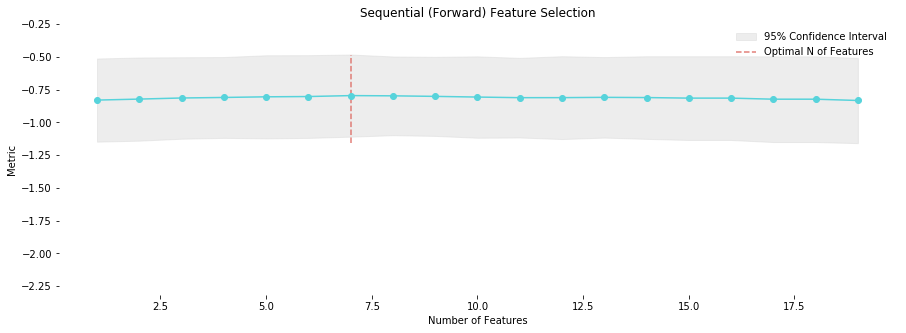

In [28]:
plot_seq_fs()

## feature selection2: no additive index'

In [29]:
X = df_carolin.drop(columns=['rights_sinhalese','growth1','growth2','growth_full'], axis=1)
Y = df_carolin['rights_sinhalese']

time_start = time.time()

sfs_f = sfs(estimator = linear_model.LinearRegression(), k_features= 'best', forward = True, verbose = 2, scoring = 'neg_mean_squared_error', cv = 10, n_jobs = 6)

sfs_f = sfs_f.fit(X,Y)


time_stop = time.time()
time_to_finish = time_stop - time_start

print('\nminutes it took: {}\n'. format(time_to_finish/60))

[Parallel(n_jobs=6)]: Done   5 out of  16 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=6)]: Done  16 out of  16 | elapsed:    0.4s finished

[2018-12-10 23:23:21] Features: 1/16 -- score: -0.8294071685705934[Parallel(n_jobs=6)]: Done   4 out of  15 | elapsed:    0.2s remaining:    0.4s
[Parallel(n_jobs=6)]: Done  12 out of  15 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=6)]: Done  15 out of  15 | elapsed:    0.3s finished

[2018-12-10 23:23:22] Features: 2/16 -- score: -0.8217423541990158[Parallel(n_jobs=6)]: Done   3 out of  14 | elapsed:    0.2s remaining:    0.6s
[Parallel(n_jobs=6)]: Done  11 out of  14 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=6)]: Done  14 out of  14 | elapsed:    0.3s finished

[2018-12-10 23:23:22] Features: 3/16 -- score: -0.8133355629419958[Parallel(n_jobs=6)]: Done   9 out of  13 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=6)]: Done  13 out of  13 | elapsed:    0.4s finished

[2018-12-10 23:23:23] Features: 4/16 -


minutes it took: 0.10323286851247152




[2018-12-10 23:23:27] Features: 15/16 -- score: -0.814320519343722[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished

[2018-12-10 23:23:27] Features: 16/16 -- score: -0.8225561260300894

In [30]:
best_set = first_best(selector = sfs_f)
best_set

[7,
 -0.7978102343483315,
 (0, 3, 4, 11, 12, 13, 14),
 ('distress', 'age', 'edu', 'E2j', 'E2b', 'E2d', 'E2e')]

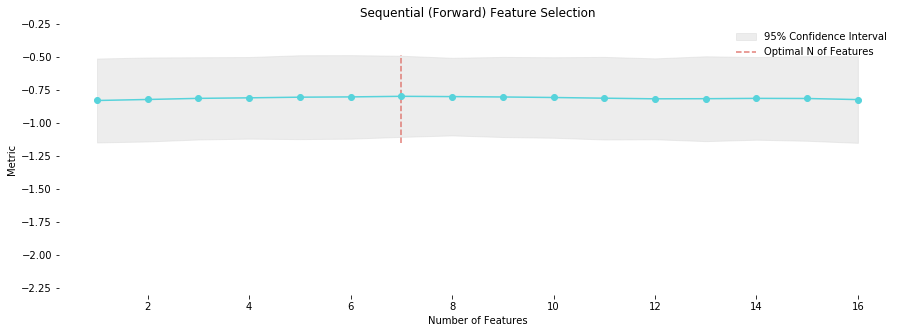

In [31]:
plot_seq_fs()

'E2b', 'E2d', 'E2e' er fra growth2

'E2j' er fra growth3

# PCA:

In [16]:

# growthf1 + 2 eller growthfactor1 + 2 måske er PCA'erne..

# *generate two different growth variables 
# ***PCF analysis 
# factor E2a-E2j if tamil2, pcf blanks(0.3)
# rotate, promax blanks(0.3)
# predict growth1factor growth2factor 
# //two factors 

# //addive index
# alpha E2a E2c E2f E2g E2i E2j //0.83
# alpha E2b E2d E2e E2h //0.77

# gen growth1=(E2a+E2c+E2f+E2g+E2i+E2j)/6
# gen growth2=(E2b+E2d+E2e+E2h)/4

## men vi kan da lige så godt bruge PCA'erne hvis de er der?

In [33]:
Es_non_norm = df_carolin[['E2a','E2c','E2f','E2g','E2i','E2j','E2b','E2d','E2e','E2h']]
var_names =  Es_non_norm.columns

Es = (Es_non_norm-Es_non_norm.mean())/Es_non_norm.std() # Tror den her er bedst


pca = decomposition.PCA()
Es_pca = pca.fit_transform(Es)

var_names =  Es.columns

comps = pd.DataFrame(pca.components_,columns=var_names)


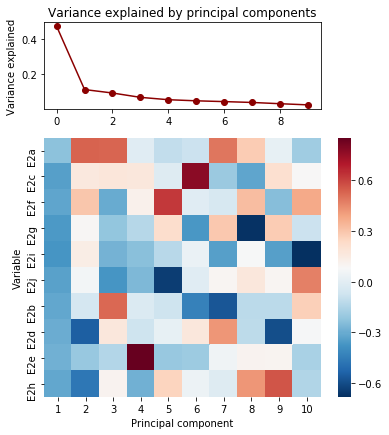

In [34]:
plt.axes([0.05,1.05,0.64,0.3])
plt.title('Variance explained by principal components');
plt.ylabel('Variance explained');
plt.plot(pca.explained_variance_ratio_, "-o", color = "darkred") # husk!

plt.axes([0.05,0.05,0.8,0.9])
sns.heatmap(comps.T, xticklabels=range(1,11), cmap="RdBu_r" )
plt.ylabel("Variable")
plt.xlabel('Principal component');

plt.show()

In [ ]:
# Så PC2 passer en lille smule på hvad carolin har gjort.

#growth1=(E2a+E2c+E2f+E2g+E2i+E2j)/6
#growth2=(E2b+E2d+E2e+E2h)/4

In [35]:
comps

,E2a,E2c,E2f,E2g,E2i,E2j,E2b,E2d,E2e,E2h
0,-0.227329,-0.339192,-0.319414,-0.354551,-0.369230,-0.329526,-0.312803,-0.294661,-0.280155,-0.312192
1,0.536077,0.164621,0.297966,0.094354,0.142115,0.066205,-0.050619,-0.546159,-0.204082,-0.469845
2,0.535025,0.177940,-0.298940,-0.213593,-0.274945,-0.363508,0.526974,0.171152,-0.141184,0.111529
3,-0.005787,0.173805,0.127253,-0.134497,-0.233811,-0.260907,-0.024805,-0.075249,0.853269,-0.279982
4,-0.104935,-0.012339,0.629569,0.220241,-0.128035,-0.643418,-0.071046,0.025602,-0.204721,0.256864
5,-0.080392,0.776927,-0.007065,-0.361629,0.036449,-0.008114,-0.434464,0.175290,-0.191459,0.039477
6,0.495393,-0.197788,-0.045417,0.290090,-0.335789,0.102298,-0.569518,0.422881,0.051449,-0.014330
7,0.278267,-0.319237,0.324985,-0.674198,0.082902,0.174080,-0.121752,-0.117590,0.114066,0.426215
8,0.020904,0.208994,-0.242879,0.278490,-0.334686,0.099111,-0.122125,-0.591820,0.106451,0.566571
9,-0.184120,0.086591,0.374910,-0.078399,-0.681063,0.471354,0.270888,0.075109,-0.162191,-0.143348


In [36]:
df_carolin['rights_sinhalese'].unique()

array([2., 3., 0., 1.])

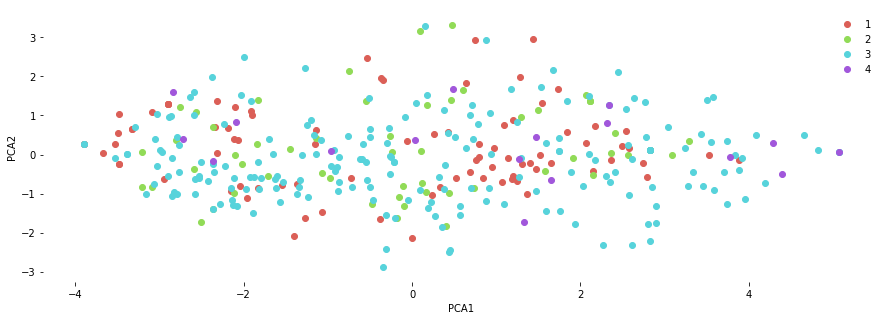

In [44]:
n = len(df_carolin['rights_sinhalese'].unique())

colors = sns.color_palette("hls", n) #VIGTIG med 11
#sns.set_palette(palette=my_color_map) 

plt.figure(figsize=[15,5])

for i in range(n):
    
    rights_mask = df_carolin['rights_sinhalese'] == i
    plt.scatter(Es_pca[rights_mask,0],Es_pca[rights_mask,1], c = colors[i], label = str(i+1))

plt.xlabel('PCA1')
plt.ylabel('PCA2')
    
plt.legend(frameon=False)
sns.despine(left=True, bottom=True)

plt.show()

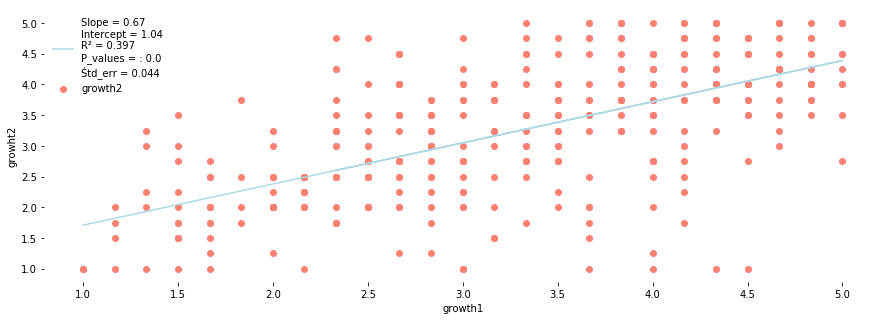

In [66]:
plt.figure(figsize=[15,5])

x = df_carolin['growth1']
y = df_carolin['growth2']


slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

        
line=(slope*x+intercept)
        
label = 'Slope = ' + str(round(slope,3)) + \
        '\n' + 'Intercept = ' + str(round(intercept,3)) + \
        '\n' + 'R² = ' + str(round(r_value**2,3)) +\
        '\n' + 'P_values = : ' + str(round(p_value,3)) +\
        '\n' + 'Śtd_err = ' + str(round(std_err,3))


plt.scatter(x,y, color = 'salmon')
plt.plot(x, line, '-', color = 'lightblue', label = label) #, label = label_list[i])#, label = label)

#plt.fill_between(x, line+(std_err*5), line-(std_err*5), color='lightgrey', alpha = 0.4, label = '95% Confidence Interval')


plt.xlabel('growth1')
plt.ylabel('growht2')


plt.legend(frameon=False)
sns.despine(left=True, bottom=True)

plt.show()